In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import datetime

In [2]:
file_path_streets = './force_data/city-of-london_street.csv'
file_path_outcomes = './force_data/city-of-london_outcomes.csv'
file_path_stop_and_search = './force_data/city-of-london_stop_and_search.csv'

In [3]:
df_streets = pd.read_csv(file_path_streets)
df_outcomes = pd.read_csv(file_path_outcomes)
df_stop_and_search = pd.read_csv(file_path_stop_and_search)

In [4]:
df_streets.head()

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,0,NaN,2010-12,City of London Police,City of London Police,-0.112952,51.518267,On or near Southampton Buildings,E01000914,Camden 028B,Vehicle crime,NaN,NaN
1,1,NaN,2010-12,City of London Police,City of London Police,-0.114940,51.518632,On or near Brownlow Street,E01000914,Camden 028B,Other crime,NaN,NaN
2,2,NaN,2010-12,City of London Police,City of London Police,-0.112952,51.518267,On or near Southampton Buildings,E01000914,Camden 028B,Other crime,NaN,NaN
3,3,NaN,2010-12,City of London Police,City of London Police,-0.112952,51.518267,On or near Southampton Buildings,E01000914,Camden 028B,Other crime,NaN,NaN
4,4,NaN,2010-12,City of London Police,City of London Police,-0.125742,51.516368,On or near Grape Street,E01000919,Camden 028D,Anti-social behaviour,NaN,NaN


In [5]:
df_outcomes.head()

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,0,7d7fe3b1924bbac8dec539694fa9f9be740f3eb5c9323c...,2012-01,City of London Police,City of London Police,-0.080376,51.517244,On or near Supermarket,E01032739,City of London 001F,Court case unable to proceed
1,1,a5a4bdda85df3afbd668b78dcee3d6738c7f1c3990ae96...,2012-01,City of London Police,City of London Police,-0.078393,51.515728,On or near CLOTHIER STREET,E01000005,City of London 001E,Offender given community sentence
2,2,abdaa52abae374f95acb1990ff50f81f67935a488a9d83...,2012-01,City of London Police,City of London Police,-0.096363,51.513377,On or near NEW CHANGE,E01032739,City of London 001F,Offender given conditional discharge
3,3,2f5cb65af663340ccc4c197637d14bdc6d90c4b2859939...,2012-01,City of London Police,City of London Police,-0.100179,51.514158,On or near Shopping Area,E01032739,City of London 001F,Offender sent to prison
4,4,78d165b8b3c6fb3b5d654e8aa9e1f3f7850e559faf7541...,2012-01,City of London Police,City of London Police,-0.109155,51.516668,On or near FETTER LANE,E01032740,City of London 001G,Offender sent to prison


In [6]:
df_stop_and_search.head()

,Unnamed: 0,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,0,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,False
1,1,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False
2,2,Person search,2015-03-02T18:45:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),NaN,Suspect arrested,True,True
3,3,Person search,2015-03-02T19:15:00+00:00,NaN,NaN,NaN,NaN,Male,over 34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False
4,4,Person and Vehicle search,2015-03-03T15:50:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,True


In [7]:
df_stop_and_search['Datetime'] = pd.to_datetime(df_stop_and_search['Date'])
df_stop_and_search['Date'] = df_stop_and_search['Datetime'].dt.date

In [8]:
df_streets.shape, df_outcomes.shape, df_stop_and_search.shape

((79369, 13), (58811, 11), (12708, 17))

<AxesSubplot:>

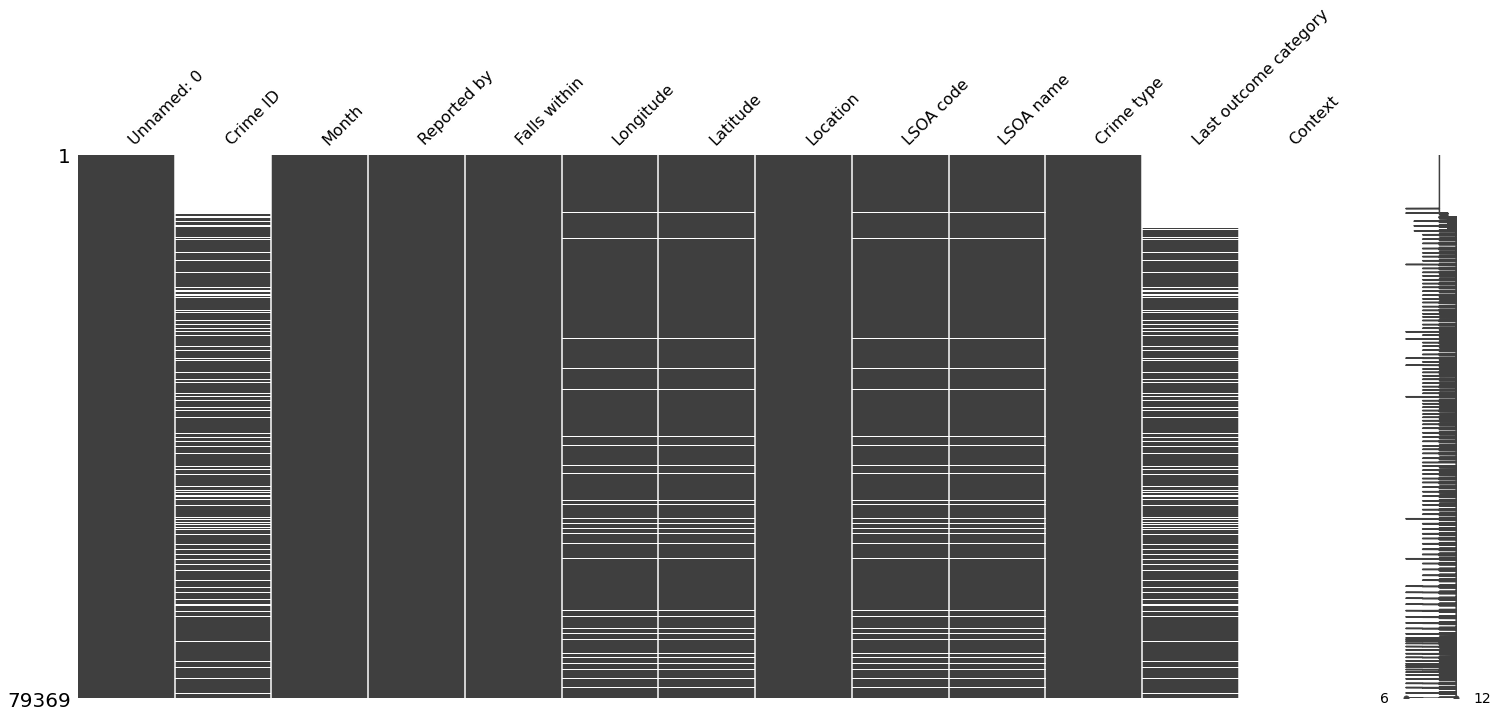

In [9]:
msno.matrix(df_streets)

In [10]:
def create_month_plot(df):
    df_months = df['Month'].value_counts()
    df_months.sort_index(inplace=True)
    df_months.plot()

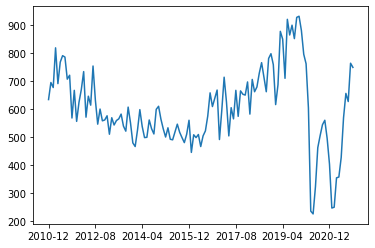

In [11]:
create_month_plot(df_streets)

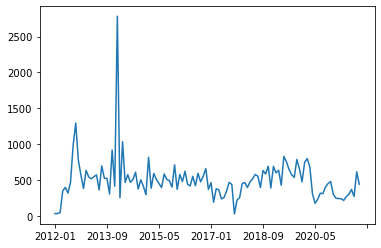

In [12]:
create_month_plot(df_outcomes)

<AxesSubplot:>

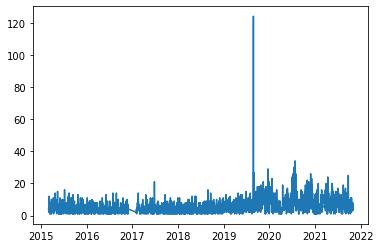

In [17]:
df_dates = df_stop_and_search['Date'].value_counts()
df_dates.sort_index(inplace=True)
df_dates.plot()

In [20]:
df_dates.sort_values()

2018-02-28      1
2018-08-01      1
2017-04-09      1
2017-04-10      1
2015-11-07      1
             ... 
2020-07-16     28
2019-12-21     29
2020-07-17     30
2020-07-25     34
2019-08-27    124
Name: Date, Length: 2200, dtype: int64

In [25]:
df_stop_and_search[df_stop_and_search['Date'] == datetime.date(year=2019,month=8,day=27)]

,Unnamed: 0,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Datetime
6287,148,Person search,2019-08-27,NaN,NaN,51.527286,-0.215815,Male,NaN,NaN,NaN,Criminal Justice and Public Order Act 1994 (se...,Offensive weapons,A no further action disposal,False,False,2019-08-27 00:00:12+00:00
6288,149,Person search,2019-08-27,NaN,NaN,51.527286,-0.215815,Male,NaN,NaN,NaN,Criminal Justice and Public Order Act 1994 (se...,Offensive weapons,A no further action disposal,False,False,2019-08-27 00:02:02+00:00
6289,150,Person search,2019-08-27,NaN,NaN,51.527286,-0.215815,Male,NaN,NaN,NaN,Criminal Justice and Public Order Act 1994 (se...,Offensive weapons,A no further action disposal,False,False,2019-08-27 00:03:12+00:00
6290,151,Person search,2019-08-27,NaN,NaN,51.527286,-0.215815,Male,NaN,NaN,NaN,Criminal Justice and Public Order Act 1994 (se...,Offensive weapons,A no further action disposal,False,False,2019-08-27 00:04:03+00:00
6291,152,Person search,2019-08-27,NaN,NaN,51.527286,-0.215815,Male,NaN,NaN,NaN,Criminal Justice and Public Order Act 1994 (se...,Offensive weapons,A no further action disposal,False,False,2019-08-27 00:08:15+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6406,267,Person search,2019-08-27,NaN,NaN,51.527286,-0.215815,Male,NaN,NaN,NaN,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False,False,2019-08-27 03:50:03+00:00
6407,268,Person search,2019-08-27,NaN,NaN,51.527286,-0.215815,Male,NaN,NaN,NaN,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False,False,2019-08-27 04:00:26+00:00
6408,269,Person search,2019-08-27,NaN,NaN,51.525845,-0.207409,Male,25-34,Asian/Asian British - Any other Asian background,Asian,Criminal Justice and Public Order Act 1994 (se...,Offensive weapons,Community resolution,True,False,2019-08-27 09:14:49+00:00
6409,270,Person search,2019-08-27,NaN,NaN,51.527286,-0.215815,Male,NaN,NaN,NaN,Criminal Justice and Public Order Act 1994 (se...,Offensive weapons,A no further action disposal,False,False,2019-08-27 11:56:19+00:00
